# Pytorch 教程
## 配套教材《深度学习入门——基于python的理论与实现》

## 神经网络 以MNIST为例

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt


In [2]:
n_epochs = 20
batch_size = 100
learning_rate = 0.01
#超参数设置

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)
#读取数据

In [4]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
net(example_data).shape


torch.Size([100, 1, 28, 28])


torch.Size([100, 10])

In [6]:
def loader_acc(net,loader):
    acc_num = 0
    item_num = 0
    for data in enumerate(loader):
        
        idx = data[0]
        (features,label) = data[1]
        
        output = net(features)
        output = torch.argmax(output,1)
        acc_sum = torch.sum(output==label)
        acc_num+=acc_sum.item()
        item_num +=len(label)
    return (acc_num/item_num)    
#正确率测试

In [7]:
#训练过程
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

train_accuracy_list = []
test_accuracy_list = []

for count in range(n_epochs): 
    for train in enumerate(train_loader):

        train_idx = train[0]
        (train_data,train_label) = train[1]  
        
        optimizer.zero_grad()   # zero the gradient buffers
        
        train_output = net(train_data)
        train_loss = criterion(train_output,train_label)
        train_loss.backward()
        
        optimizer.step()    # Does the update
        

    train_accuracy = loader_acc(net,train_loader)
    train_accuracy_list.append(train_accuracy)
    test_accuracy = loader_acc(net,test_loader)
    test_accuracy_list.append(test_accuracy)
    print("epoch ",count,"train_acc",train_accuracy,"test_acc",test_accuracy)
    #     print(accuracy)
    #     print("train loss:",train_loss.item(),"test loss:",test_loss.item())

epoch  0 train_acc 0.9798166666666667 test_acc 0.9775
epoch  1 train_acc 0.9760833333333333 test_acc 0.9744
epoch  2 train_acc 0.9786666666666667 test_acc 0.9762
epoch  3 train_acc 0.9809 test_acc 0.979
epoch  4 train_acc 0.9856833333333334 test_acc 0.9819
epoch  5 train_acc 0.9880166666666667 test_acc 0.9826
epoch  6 train_acc 0.9867 test_acc 0.9832
epoch  7 train_acc 0.98555 test_acc 0.9815
epoch  8 train_acc 0.9878166666666667 test_acc 0.9835
epoch  9 train_acc 0.9864 test_acc 0.9804
epoch  10 train_acc 0.9868833333333333 test_acc 0.9814
epoch  11 train_acc 0.98705 test_acc 0.9822
epoch  12 train_acc 0.9895333333333334 test_acc 0.9818
epoch  13 train_acc 0.9806 test_acc 0.9752
epoch  14 train_acc 0.9836 test_acc 0.9774
epoch  15 train_acc 0.9885 test_acc 0.9823
epoch  16 train_acc 0.9915666666666667 test_acc 0.9842
epoch  17 train_acc 0.98935 test_acc 0.9814
epoch  18 train_acc 0.9940833333333333 test_acc 0.9868
epoch  19 train_acc 0.9895 test_acc 0.9835


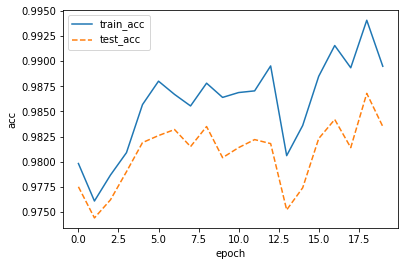

In [8]:
# train_loss_list
# test_loss_list
#画曲线
x = torch.arange(0,len(train_accuracy_list))
y1 = train_accuracy_list
y2 = test_accuracy_list
#plt.subplot(1,2,1)
plt.plot(x,y1,label='train_acc')
plt.plot(x,y2,label='test_acc',linestyle='--')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()

# x1 = torch.arange(0,len(train_loss_list))
# t1 = train_loss_list
# t2 = test_loss_list

# plt.subplot(1,2,2)
# plt.plot(x1,t1,label='train_loss')
# plt.plot(x1,t2,label='test_loss',linestyle='--')
# plt.xlabel('batch')
# plt.ylabel('loss')
# plt.legend()
plt.show()